<a href="https://colab.research.google.com/github/mzakkia/Global-Fashion-Retail-Sales/blob/main/Global_Fashion_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Prep

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
pd.set_option('display.max_columns', None)
drive.mount('/content/mydrive')

Mounted at /content/mydrive


## Transactions

In [2]:
trans_columns = ["Invoice ID", "Customer ID", "Product ID", "Size", "Color", "Unit Price", "Quantity", "Discount", "Line Total", "Store ID", "Employee ID", "Date", "Transaction Type", "Payment Method",]
df_transactions = pd.read_csv('/content/mydrive/MyDrive/Global Fashion Retail Sales/transactions (1).csv', parse_dates=['Date'], usecols=trans_columns)

In [3]:
df_transactions.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416827 entries, 0 to 6416826
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Invoice ID        6416827 non-null  object        
 1   Customer ID       6416827 non-null  int64         
 2   Product ID        6416827 non-null  int64         
 3   Size              6003725 non-null  object        
 4   Color             2066044 non-null  object        
 5   Unit Price        6416827 non-null  float64       
 6   Quantity          6416827 non-null  int64         
 7   Date              6416827 non-null  datetime64[ns]
 8   Discount          6416827 non-null  float64       
 9   Line Total        6416827 non-null  float64       
 10  Store ID          6416827 non-null  int64         
 11  Employee ID       6416827 non-null  int64         
 12  Transaction Type  6416827 non-null  object        
 13  Payment Method    6416827 non-null  object

In [4]:
#in the dataset it's stated that if there is blank in size and color meaning that those columns have no variation
df_transactions['Size'] = df_transactions['Size'].fillna(value='all size')
df_transactions['Color'] = df_transactions['Color'].fillna(value='no variation')
df_transactions.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416827 entries, 0 to 6416826
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Invoice ID        6416827 non-null  object        
 1   Customer ID       6416827 non-null  int64         
 2   Product ID        6416827 non-null  int64         
 3   Size              6416827 non-null  object        
 4   Color             6416827 non-null  object        
 5   Unit Price        6416827 non-null  float64       
 6   Quantity          6416827 non-null  int64         
 7   Date              6416827 non-null  datetime64[ns]
 8   Discount          6416827 non-null  float64       
 9   Line Total        6416827 non-null  float64       
 10  Store ID          6416827 non-null  int64         
 11  Employee ID       6416827 non-null  int64         
 12  Transaction Type  6416827 non-null  object        
 13  Payment Method    6416827 non-null  object

In [5]:
df_transactions['Customer ID'] = df_transactions['Customer ID'].astype('object')
df_transactions['Product ID'] = df_transactions['Product ID'].astype('object')
df_transactions['Store ID'] = df_transactions['Store ID'].astype('object')
df_transactions['Employee ID'] = df_transactions['Employee ID'].astype('object')

In [6]:
df_transactions.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416827 entries, 0 to 6416826
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Invoice ID        6416827 non-null  object        
 1   Customer ID       6416827 non-null  object        
 2   Product ID        6416827 non-null  object        
 3   Size              6416827 non-null  object        
 4   Color             6416827 non-null  object        
 5   Unit Price        6416827 non-null  float64       
 6   Quantity          6416827 non-null  int64         
 7   Date              6416827 non-null  datetime64[ns]
 8   Discount          6416827 non-null  float64       
 9   Line Total        6416827 non-null  float64       
 10  Store ID          6416827 non-null  object        
 11  Employee ID       6416827 non-null  object        
 12  Transaction Type  6416827 non-null  object        
 13  Payment Method    6416827 non-null  object

In [7]:
df_transactions.duplicated().sum()

np.int64(3841)

In [8]:
df_transactions.drop_duplicates(inplace=True)

In [9]:
df_transactions.duplicated().sum()

np.int64(0)

## Stores

In [10]:
stores_columns = ["Store ID","Store Name", "Country", "City", "Number of Employees", "Latitude", "Longitude"]
df_stores = pd.read_csv('/content/mydrive/MyDrive/Global Fashion Retail Sales/stores (1).csv',usecols=stores_columns)
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store ID             35 non-null     int64  
 1   Country              35 non-null     object 
 2   City                 35 non-null     object 
 3   Store Name           35 non-null     object 
 4   Number of Employees  35 non-null     int64  
 5   Latitude             35 non-null     float64
 6   Longitude            35 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ KB


In [11]:
#filtering to choose only USA
df_stores['Country'].unique()

array(['United States', '中国', 'Deutschland', 'United Kingdom', 'France',
       'España', 'Portugal'], dtype=object)

In [12]:
df_stores = df_stores[df_stores['Country'] == 'United States']

In [13]:
df_stores['Country'].unique()

array(['United States'], dtype=object)

In [14]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store ID             5 non-null      int64  
 1   Country              5 non-null      object 
 2   City                 5 non-null      object 
 3   Store Name           5 non-null      object 
 4   Number of Employees  5 non-null      int64  
 5   Latitude             5 non-null      float64
 6   Longitude            5 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 320.0+ bytes


In [15]:
df_stores['Store ID'] = df_stores['Store ID'].astype('object')

In [16]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store ID             5 non-null      object 
 1   Country              5 non-null      object 
 2   City                 5 non-null      object 
 3   Store Name           5 non-null      object 
 4   Number of Employees  5 non-null      int64  
 5   Latitude             5 non-null      float64
 6   Longitude            5 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 320.0+ bytes


In [17]:
df_stores.duplicated().sum()

np.int64(0)

## Products

In [18]:
products_cols = ["Product ID", "Category", "Sub Category", "Production Cost"]
df_products = pd.read_csv('/content/mydrive/MyDrive/Global Fashion Retail Sales/products (1).csv', usecols=products_cols)
df_products.head(2)

,Product ID,Category,Sub Category,Production Cost
0,1,Feminine,Coats and Blazers,10.73
1,2,Feminine,Sweaters and Knitwear,19.55


In [19]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17940 entries, 0 to 17939
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product ID       17940 non-null  int64  
 1   Category         17940 non-null  object 
 2   Sub Category     17940 non-null  object 
 3   Production Cost  17940 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 560.8+ KB


In [20]:
df_products['Product ID'] = df_products['Product ID'].astype('object')
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17940 entries, 0 to 17939
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product ID       17940 non-null  object 
 1   Category         17940 non-null  object 
 2   Sub Category     17940 non-null  object 
 3   Production Cost  17940 non-null  float64
dtypes: float64(1), object(3)
memory usage: 560.8+ KB


In [21]:
df_products.duplicated().sum()

np.int64(0)

## Employees

In [22]:
employees_cols = [ "Employee ID", "Position"]
df_employees = pd.read_csv('/content/mydrive/MyDrive/Global Fashion Retail Sales/employees (1).csv', usecols=employees_cols)
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Employee ID  404 non-null    int64 
 1   Position     404 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


In [23]:
df_employees['Employee ID'] = df_employees['Employee ID'].astype('object')

In [24]:
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Employee ID  404 non-null    object
 1   Position     404 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [25]:
df_employees.duplicated().sum()

np.int64(0)

## Customers

In [26]:
customers_cols = [ "Customer ID", "Gender", "Date Of Birth", "City"]
df_customers = pd.read_csv('/content/mydrive/MyDrive/Global Fashion Retail Sales/customers (1).csv', usecols=customers_cols)
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643306 entries, 0 to 1643305
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Customer ID    1643306 non-null  int64 
 1   City           1643306 non-null  object
 2   Gender         1643306 non-null  object
 3   Date Of Birth  1643306 non-null  object
dtypes: int64(1), object(3)
memory usage: 50.1+ MB


In [27]:
df_customers.head(2)

,Customer ID,City,Gender,Date Of Birth
0,1,New York,M,2003-07-15
1,2,New York,M,2000-06-16


In [28]:
df_customers['Customer ID'] = df_customers['Customer ID'].astype('object')
df_customers['Date Of Birth'] = pd.to_datetime(df_customers['Date Of Birth'])
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643306 entries, 0 to 1643305
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Customer ID    1643306 non-null  object        
 1   City           1643306 non-null  object        
 2   Gender         1643306 non-null  object        
 3   Date Of Birth  1643306 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 50.1+ MB


In [29]:
df_customers.duplicated().sum()

np.int64(0)

## Discounts

In [547]:
discounts_cols = ["Start", "End", "Discont","Description", "Category", "Sub Category"]
df_discounts = pd.read_csv('/content/mydrive/MyDrive/Global Fashion Retail Sales/discounts (1).csv', usecols=discounts_cols)
df_discounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Start         181 non-null    object 
 1   End           181 non-null    object 
 2   Discont       181 non-null    float64
 3   Description   181 non-null    object 
 4   Category      171 non-null    object 
 5   Sub Category  171 non-null    object 
dtypes: float64(1), object(5)
memory usage: 8.6+ KB


In [548]:
df_discounts.rename(columns=({'Discont':'Discount'}), inplace=True)

In [549]:
df_discounts[df_discounts['Category'].isnull()]

,Start,End,Discount,Description,Category,Sub Category
32,2020-11-27,2020-11-27,0.6,60% discount during our Black Friday Mega Sale,NaN,NaN
33,2020-12-20,2020-12-31,0.5,50% discount during our Holiday Season Sale,NaN,NaN
66,2021-11-27,2021-11-27,0.6,60% discount during our Black Friday Mega Sale,NaN,NaN
67,2021-12-20,2021-12-31,0.5,50% discount during our Holiday Season Sale,NaN,NaN
100,2022-11-27,2022-11-27,0.6,60% discount during our Black Friday Mega Sale,NaN,NaN
101,2022-12-20,2022-12-31,0.5,50% discount during our Holiday Season Sale,NaN,NaN
134,2023-11-27,2023-11-27,0.6,60% discount during our Black Friday Mega Sale,NaN,NaN
135,2023-12-20,2023-12-31,0.5,50% discount during our Holiday Season Sale,NaN,NaN
168,2024-11-27,2024-11-27,0.6,60% discount during our Black Friday Mega Sale,NaN,NaN
169,2024-12-20,2024-12-31,0.5,50% discount during our Holiday Season Sale,NaN,NaN


In [550]:
#We observed that the null values in the 'Category' and 'Sub Category' columns consistently occurred on the same date each year
#specifically during Black Friday and the holiday season sales, when stores typically offer large discounts across all product categories.

df_discounts['Category'] = df_discounts['Category'].fillna(value='all category')
df_discounts['Sub Category'] = df_discounts['Sub Category'].fillna(value='all sub category')
df_discounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Start         181 non-null    object 
 1   End           181 non-null    object 
 2   Discount      181 non-null    float64
 3   Description   181 non-null    object 
 4   Category      181 non-null    object 
 5   Sub Category  181 non-null    object 
dtypes: float64(1), object(5)
memory usage: 8.6+ KB


In [551]:
df_discounts['Start'] = pd.to_datetime(df_discounts['Start'])
df_discounts['End'] = pd.to_datetime(df_discounts['End'])

In [552]:
df_discounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Start         181 non-null    datetime64[ns]
 1   End           181 non-null    datetime64[ns]
 2   Discount      181 non-null    float64       
 3   Description   181 non-null    object        
 4   Category      181 non-null    object        
 5   Sub Category  181 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 8.6+ KB


In [553]:
df_discounts.duplicated().sum()

np.int64(0)

## USA transactions

In [496]:
usa_transactions = df_transactions.merge(df_stores, on='Store ID', how='inner')
usa_transactions = usa_transactions[usa_transactions['Country'] == 'United States']
usa_transactions = usa_transactions[trans_columns]
usa_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686565 entries, 0 to 1686564
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Invoice ID        1686565 non-null  object        
 1   Customer ID       1686565 non-null  object        
 2   Product ID        1686565 non-null  object        
 3   Size              1686565 non-null  object        
 4   Color             1686565 non-null  object        
 5   Unit Price        1686565 non-null  float64       
 6   Quantity          1686565 non-null  int64         
 7   Discount          1686565 non-null  float64       
 8   Line Total        1686565 non-null  float64       
 9   Store ID          1686565 non-null  object        
 10  Employee ID       1686565 non-null  object        
 11  Date              1686565 non-null  datetime64[ns]
 12  Transaction Type  1686565 non-null  object        
 13  Payment Method    1686565 non-null  object

In [497]:
usa_transactions['Color'] = usa_transactions['Color'].str.title()

In [498]:
usa_transactions.head()

,Invoice ID,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Discount,Line Total,Store ID,Employee ID,Date,Transaction Type,Payment Method
0,INV-US-001-03558761,47162,485,M,No Variation,80.5,1,0.0,80.5,1,7,2023-01-01 15:42:00,Sale,Cash
1,INV-US-001-03558761,47162,2779,G,No Variation,31.5,1,0.4,18.9,1,7,2023-01-01 15:42:00,Sale,Cash
2,INV-US-001-03558761,47162,64,M,Neutral,45.5,1,0.4,27.3,1,7,2023-01-01 15:42:00,Sale,Cash
3,INV-US-001-03558762,10142,131,M,Blue,70.0,1,0.4,42.0,1,6,2023-01-01 20:04:00,Sale,Cash
4,INV-US-001-03558762,10142,716,L,White,26.0,1,0.0,26.0,1,6,2023-01-01 20:04:00,Sale,Cash


In [499]:
usa_transactions.duplicated().sum()

np.int64(0)

#Data Exploration

## For the USA Transactions

In [500]:
usa_transactions.describe()

,Unit Price,Quantity,Discount,Line Total,Date
count,1.686565e+06,1.686565e+06,1.686565e+06,1.686565e+06,1686565
mean,5.165441e+01,1.099999e+00,1.166818e-01,4.450958e+01,2024-03-10 02:24:21.538439424
min,4.000000e+00,1.000000e+00,0.000000e+00,-4.440000e+02,2023-01-01 00:00:00
25%,3.250000e+01,1.000000e+00,0.000000e+00,2.450000e+01,2023-09-15 20:39:00
50%,4.500000e+01,1.000000e+00,0.000000e+00,3.862000e+01,2024-02-25 00:00:00
75%,6.400000e+01,1.000000e+00,2.500000e-01,5.950000e+01,2024-10-11 18:46:00
max,1.525000e+02,3.000000e+00,6.000000e-01,4.560000e+02,2025-03-18 20:59:00
std,2.711634e+01,3.959052e-01,1.977779e-01,4.234687e+01,NaN


In [501]:
# there is negative value in line total which doesn't make sense, and also there is 3 in quantity which should be investigated more

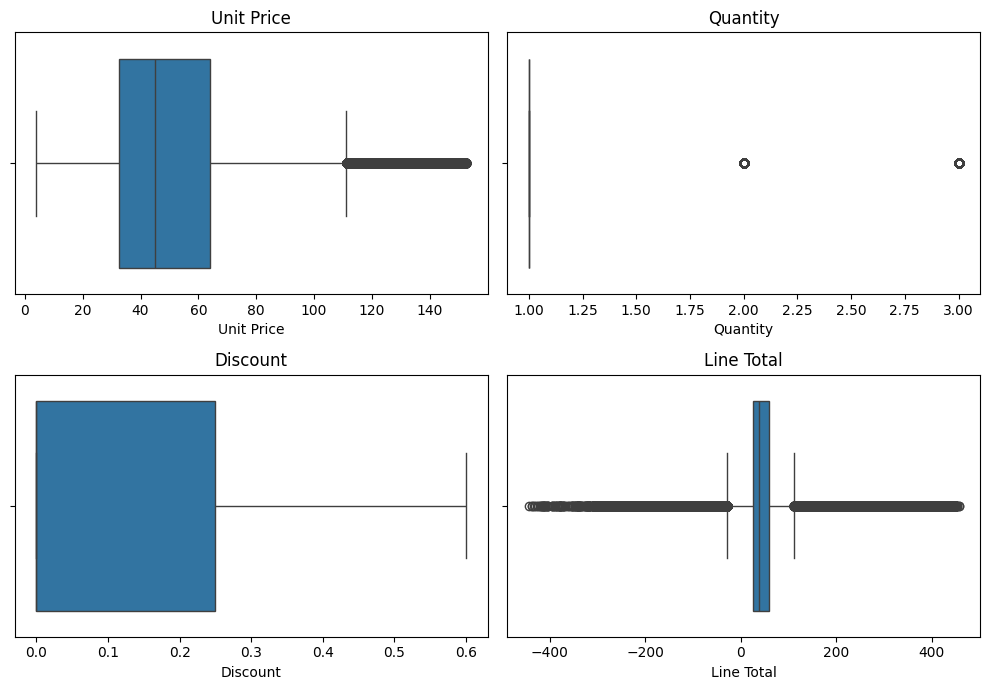

In [502]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize=(10,7))
sns.boxplot(data=usa_transactions, x=usa_transactions['Unit Price'], ax=axes[0][0])
axes[0][0].set_title('Unit Price')
sns.boxplot(data=usa_transactions, x=usa_transactions['Quantity'], ax=axes[0][1])
axes[0][1].set_title('Quantity')
sns.boxplot(data=usa_transactions, x=usa_transactions['Discount'], ax=axes[1][0])
axes[1][0].set_title('Discount')
sns.boxplot(data=usa_transactions, x=usa_transactions['Line Total'], ax=axes[1][1])
axes[1][1].set_title('Line Total')
plt.tight_layout()

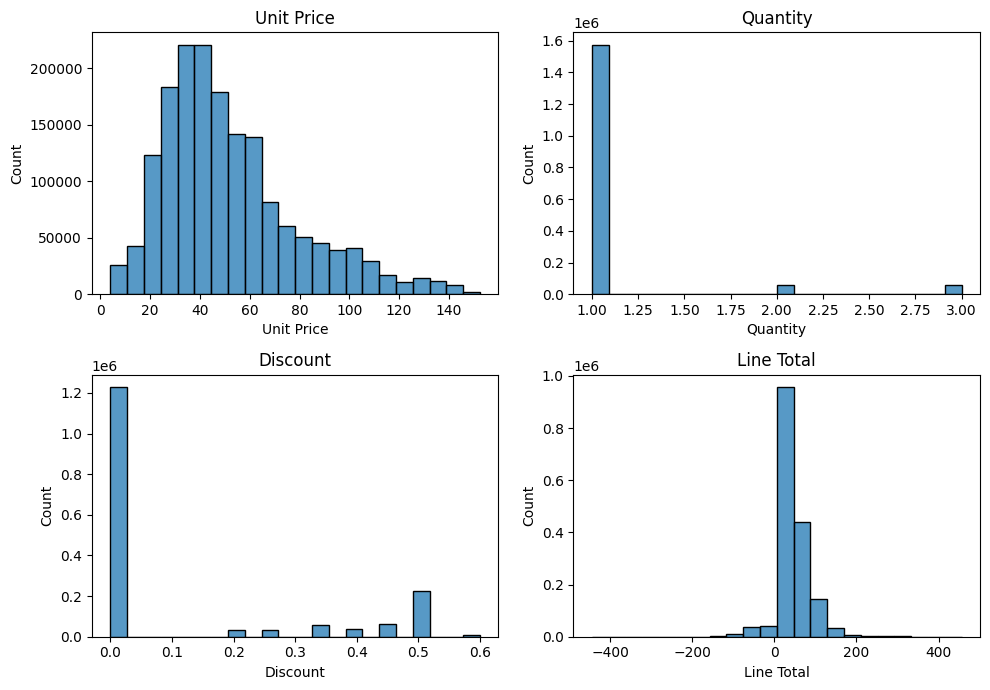

In [503]:
fig, axes = plt.subplots(2,2,figsize=(10,7))
sns.histplot(usa_transactions['Unit Price'], bins='sturges', ax=axes[0][0])
axes[0][0].set_title('Unit Price')
sns.histplot(usa_transactions['Quantity'], bins='sturges', ax=axes[0][1])
axes[0][1].set_title('Quantity')
sns.histplot(usa_transactions['Discount'], bins='sturges', ax=axes[1][0])
axes[1][0].set_title('Discount')
sns.histplot(usa_transactions['Line Total'], bins='sturges', ax=axes[1][1])
axes[1][1].set_title('Line Total')
plt.tight_layout()

In [504]:
# Quantity and Line Total look suspicious

In [106]:
negativelinetotal = usa_transactions[usa_transactions['Line Total'] <= 0]
negativelinetotal.head()

,Invoice ID,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Discount,Line Total,Store ID,Employee ID,Date,Transaction Type,Payment Method
15,RET-US-001-03558764,1968,1208,M,Silver,75.0,1,0.0,-45.0,1,9,2023-01-01,Return,Credit Card
16,RET-US-001-03558764,1968,2639,M,White,45.5,1,0.0,-27.3,1,9,2023-01-01,Return,Credit Card
31,RET-US-001-03558763,8286,1395,M,No Variation,95.5,1,0.0,-95.5,1,6,2023-01-01,Return,Cash
40,RET-US-001-03558767,14906,2924,XXL,Neutral,54.0,1,0.0,-32.4,1,13,2023-01-01,Return,Credit Card
103,RET-US-001-03558799,21979,377,M,Lilac,42.0,1,0.0,-25.2,1,7,2023-01-01,Return,Credit Card


In [507]:
#line total is negative because of the transaction type return, so it's normal

usa_transactions[(usa_transactions['Line Total'] <= 0) & (usa_transactions['Transaction Type'] == 'Sale')]

,Invoice ID,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Discount,Line Total,Store ID,Employee ID,Date,Transaction Type,Payment Method


In [130]:
usa_transactions[usa_transactions['Quantity'] != 1]

,Invoice ID,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Discount,Line Total,Store ID,Employee ID,Date,Transaction Type,Payment Method
22,INV-US-001-03558774,13166,105,M,Yellow,45.0,3,0.40,81.00,1,9,2023-01-01 14:43:00,Sale,Cash
47,INV-US-001-03558793,29942,947,all size,No Variation,13.5,3,0.00,40.50,1,6,2023-01-01 13:13:00,Sale,Credit Card
65,INV-US-001-03558809,19800,939,S,No Variation,56.5,2,0.00,113.00,1,6,2023-01-01 19:07:00,Sale,Credit Card
84,INV-US-001-03558824,45233,127,P,Blue,41.5,3,0.40,74.70,1,11,2023-01-01 16:47:00,Sale,Credit Card
93,INV-US-001-03558831,329975,699,M,No Variation,50.5,3,0.40,90.90,1,8,2023-01-01 17:06:00,Sale,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686426,INV-US-005-04364145,271501,15173,L,No Variation,38.5,3,0.35,75.08,5,57,2025-03-18 11:06:00,Sale,Cash
1686431,INV-US-005-04364149,286166,17824,XL,Beige,40.0,2,0.35,52.00,5,61,2025-03-18 08:47:00,Sale,Credit Card
1686454,INV-US-005-04364164,274151,17298,M,No Variation,127.0,3,0.00,381.00,5,54,2025-03-18 10:22:00,Sale,Credit Card
1686517,RET-US-005-04363238,287875,15172,M,Turquoise,58.5,2,0.00,58.50,5,59,2025-03-18 00:00:00,Return,Cash


In [131]:
# the quantity is normal cause customer might buy more than 1 product

## For Customers

In [508]:
df_customers.City.unique()

array(['New York', 'Newark', 'Jersey City', 'Yonkers', 'White Plains',
       'New Rochelle', 'Stamford', 'Bridgeport', 'Elizabeth', 'Paterson',
       'Hempstead', 'Los Angeles', 'Long Beach', 'Anaheim', 'Santa Ana',
       'Irvine', 'Glendale', 'Burbank', 'Pasadena', 'Torrance',
       'Riverside', 'San Bernardino', 'Chicago', 'Aurora', 'Naperville',
       'Evanston', 'Oak Park', 'Schaumburg', 'Joliet', 'Elgin', 'Cicero',
       'Skokie', 'Arlington Heights', 'Houston', 'The Woodlands',
       'Sugar Land', 'Pearland', 'Katy', 'Baytown', 'Pasadena (TX)',
       'Missouri City', 'League City', 'Conroe', 'Galveston', 'Phoenix',
       'Mesa', 'Scottsdale', 'Tempe', 'Glendale (AZ)', 'Chandler',
       'Gilbert', 'Peoria (AZ)', 'Surprise', 'Avondale', 'Goodyear',
       'San Francisco', 'Oakland', 'San Jose', 'Berkeley', 'Daly City',
       'South San Francisco', 'Redwood City', 'Palo Alto',
       'Mountain View', 'Fremont', 'Concord', 'Miami', 'Miami Beach',
       'Hialeah', 'Fort La

In [509]:
#notice there are still cities outside the US, therefore i'll join with stores and filter only city in the US

In [510]:
cols = df_customers.columns
USA_customers = df_stores.merge(df_customers, on='City', how='inner')
USA_customers = USA_customers[cols]

In [511]:
USA_customers.head()

,Customer ID,City,Gender,Date Of Birth
0,1,New York,M,2003-07-15
1,2,New York,M,2000-06-16
2,3,New York,F,2003-07-22
3,4,New York,M,1996-11-12
4,5,New York,F,1998-02-10


In [512]:
def distribution(data, ax):
  ax = sns.barplot(data=data, x=data.iloc[:,0], y=data.iloc[:,1], ax=ax)

  for x in ax.patches:
    ax.annotate(format(x.get_height(),'.0f'),
                xy=(x.get_x()+x.get_width()/2., x.get_height()),
                ha='center', va='center',
                textcoords='offset points',
                xytext=(0,5))
  return ax

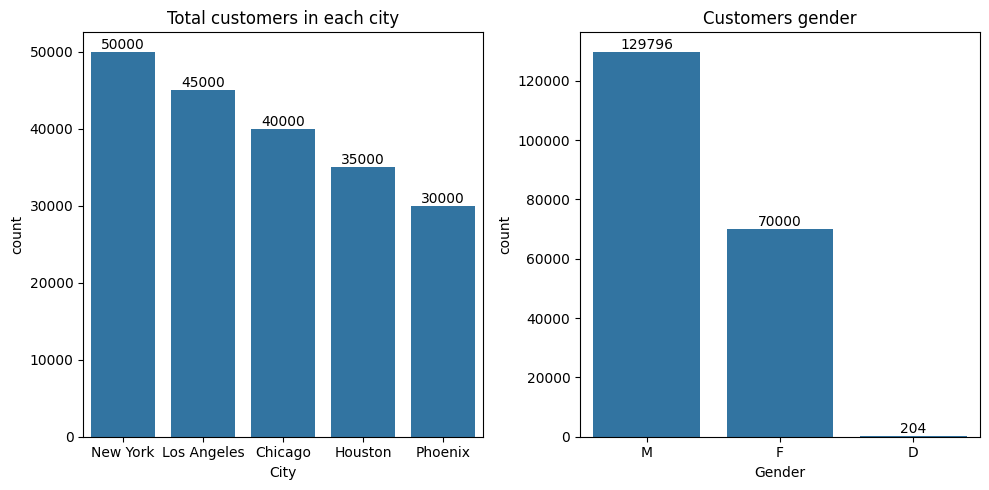

In [513]:
city_counts = USA_customers['City'].value_counts().reset_index()
gender_counts = USA_customers['Gender'].value_counts().reset_index()
fig, axes = plt.subplots(1,2, figsize=(10,5))
distribution(city_counts, axes[0])
distribution(gender_counts, axes[1])
axes[0].set_title('Total customers in each city')
axes[1].set_title('Customers gender')
plt.tight_layout()

In [514]:
# Total customers and customer's genders have already looked fine therefore we move on to another piece of information which is age

In [515]:
import datetime as dt
def counting_age(x):
  today = pd.to_datetime(dt.date.today())
  dateofbirth = x
  age_in_days = (today.date() - dateofbirth.date()).days
  age_in_years = age_in_days // 365
  return age_in_years

In [516]:
USA_customers['Age'] = USA_customers['Date Of Birth'].apply(counting_age)
USA_customers.head()

,Customer ID,City,Gender,Date Of Birth,Age
0,1,New York,M,2003-07-15,22
1,2,New York,M,2000-06-16,25
2,3,New York,F,2003-07-22,22
3,4,New York,M,1996-11-12,28
4,5,New York,F,1998-02-10,27


In [517]:
def age_classification(x):
  if x < 18:
    return "Under 18"
  elif x <= 25:
    return "18-25"
  elif x <= 35:
    return "26-35"
  elif x <= 45:
    return "36-45"
  else:
    return "45+"

USA_customers['Age_Classification'] = USA_customers['Age'].apply(age_classification)
USA_customers.head()

,Customer ID,City,Gender,Date Of Birth,Age,Age_Classification
0,1,New York,M,2003-07-15,22,18-25
1,2,New York,M,2000-06-16,25,18-25
2,3,New York,F,2003-07-22,22,18-25
3,4,New York,M,1996-11-12,28,26-35
4,5,New York,F,1998-02-10,27,26-35


In [518]:
USA_customers['Age'].describe()

,Age
count,200000.000000
mean,29.226690
std,10.929165
min,18.000000
25%,21.000000
50%,24.000000
75%,36.000000
max,66.000000


([<matplotlib.patches.Wedge at 0x79549b57f110>,
 [Text(-0.26003136966915286, 1.0688235059110482, '18-25'),
  Text(-0.6026827732908983, -0.9202029530372047, '26-35'),
  Text(0.41190017633949183, -1.019969727360325, '36-45'),
  Text(1.0261584028185402, -0.39623090783645704, '45+')],
 [Text(-0.14183529254681063, 0.5829946395878445, '57.6%'),
  Text(-0.32873605815867174, -0.5019288834748389, '16.4%'),
  Text(0.2246728234579046, -0.5563471240147226, '14.3%'),
  Text(0.5597227651737491, -0.21612594972897653, '11.7%')])

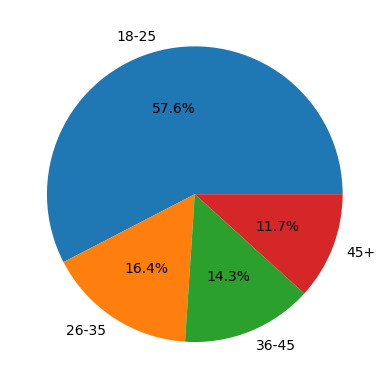

In [519]:
plt.pie(USA_customers['Age_Classification'].value_counts(), autopct='%.1F%%', labels=USA_customers['Age_Classification'].unique())

In [520]:
# We can see that age and age classification have alreade been done and the data has already been refined

## For Products

In [361]:
df_products.describe()

,Production Cost
count,17940.000000
mean,16.096189
std,11.628072
min,0.560000
25%,7.800000
50%,13.135000
75%,20.970000
max,77.190000


<Axes: xlabel='Production Cost', ylabel='Count'>

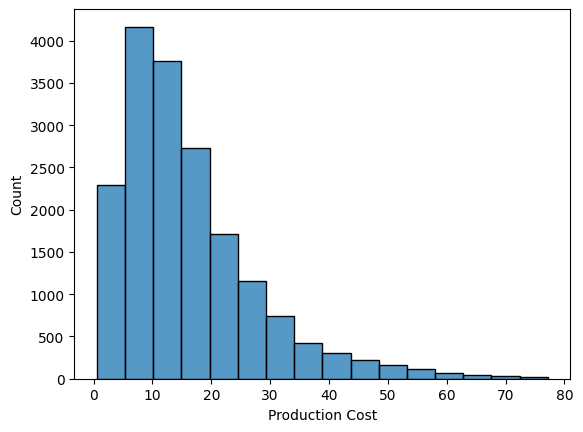

In [364]:
sns.histplot(df_products['Production Cost'], bins='sturges')

In [366]:
df_products[df_products['Production Cost'] == df_products['Production Cost'].max()]

,Product ID,Category,Sub Category,Production Cost
17800,17801,Masculine,Suits and Blazers,77.19


In [367]:
df_products[df_products['Production Cost'] == df_products['Production Cost'].min()]

,Product ID,Category,Sub Category,Production Cost
6317,6318,Children,Accessories,0.56


In [405]:
#The production cost doesn't look suspicious so we try to find another piece of information

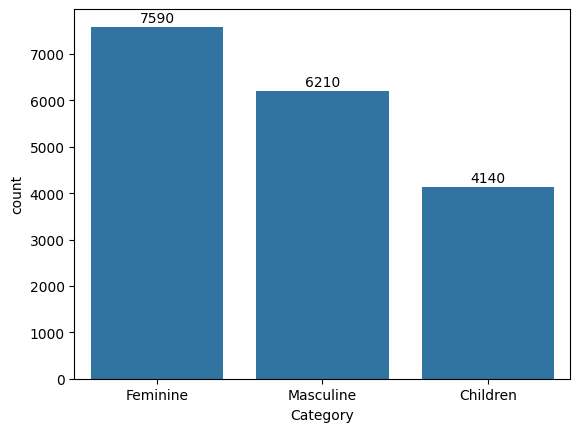

In [406]:
category_counts = df_products['Category'].value_counts().reset_index()
ax = sns.barplot(data=category_counts, x='Category', y='count')

for x in ax.patches:
  ax.annotate(format(x.get_height(), '.0F'),
              xy=(x.get_x() + x.get_width()/ 2., x.get_height()),
              xytext=(0,6),
              ha='center',
              va='center',
              textcoords='offset points')

## For employees

In [408]:
df_employees.shape

(404, 2)

In [411]:
df_employees.duplicated(subset=['Employee ID']).sum()

np.int64(0)

In [413]:
df_employees['Position'].unique()

array(['Store Manager', 'Assistant Manager', 'Cashier', 'Stock Clerk',
       'Sales Associate'], dtype=object)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Sales Associate'),
  Text(1, 0, 'Store Manager'),
  Text(2, 0, 'Assistant Manager'),
  Text(3, 0, 'Cashier'),
  Text(4, 0, 'Stock Clerk')])

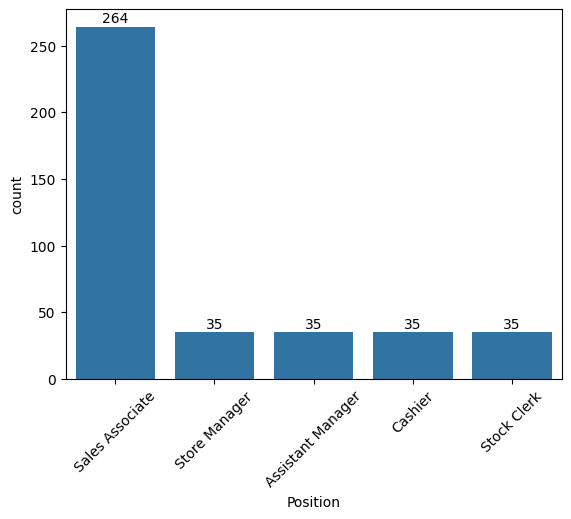

In [418]:
employees_counts = df_employees['Position'].value_counts().reset_index()
ax = sns.barplot(data=employees_counts, x='Position', y='count')
for x in ax.patches:
  ax.annotate(format(x.get_height(), '.0F'),
              xy=(x.get_x() + x.get_width()/ 2., x.get_height()),
              xytext=(0,6),
              ha='center',
              va='center',
              textcoords='offset points')
plt.xticks(rotation=45)

## For Stores

In [420]:
df_stores.shape

(5, 7)

In [421]:
df_stores.head()

,Store ID,Country,City,Store Name,Number of Employees,Latitude,Longitude
0,1,United States,New York,Store New York,10,40.7128,-74.0060
1,2,United States,Los Angeles,Store Los Angeles,8,34.0522,-118.2437
2,3,United States,Chicago,Store Chicago,9,41.8781,-87.6298
3,4,United States,Houston,Store Houston,10,29.7604,-95.3698
4,5,United States,Phoenix,Store Phoenix,9,33.4484,-112.0740


In [422]:
#Nothing wrong with stores dataset

## Discounts

In [554]:
df_discounts['Discount'].describe()

,Discount
count,181.000000
mean,0.343370
std,0.103603
min,0.200000
25%,0.250000
50%,0.350000
75%,0.400000
max,0.600000


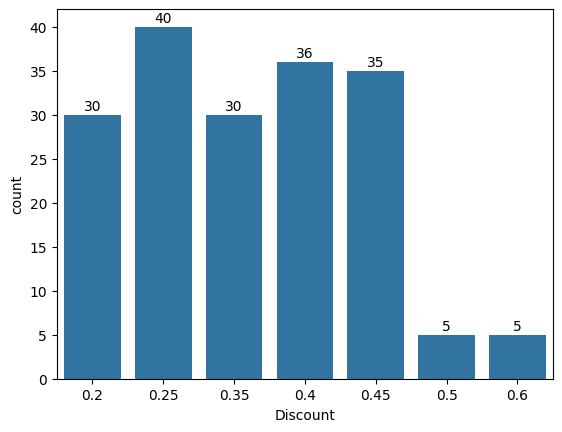

In [555]:
discounts_counts = df_discounts['Discount'].value_counts().reset_index()
ax = sns.barplot(discounts_counts, x='Discount', y='count')
for x in ax.patches:
  ax.annotate(format(x.get_height(), '.0F'),
              xy=(x.get_x() + x.get_width()/ 2., x.get_height()),
              xytext=(0,6),
              ha='center',
              va='center',
              textcoords='offset points')

In [817]:
df_discounts.head(7)

,Start,End,Discount,Description,Category,Sub Category,key
0,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Feminine,Coats and Blazers,1
1,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Feminine,Sweaters and Knitwear,1
2,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Masculine,Coats and Blazers,1
3,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Masculine,Sweaters and Sweatshirts,1
4,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Children,Coats,1
5,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Children,Sweaters,1
6,2020-03-15,2020-03-31,0.35,35% discount during our Early Spring Collectio...,Feminine,Dresses and Jumpsuits,1


In [816]:
#cartesian join
calendar['key'] = 1
df_discounts['key'] = 1

date_discount_map = calendar.merge(df_discounts, on='key')

date_discount_map = date_discount_map[
    (date_discount_map['Date'] >= date_discount_map['Start']) &
    (date_discount_map['Date'] <= date_discount_map['End'])
]

date_discount_map.drop(columns='key', inplace=True)

## Calendar

In [747]:
startdate = usa_transactions['Date'].min()
enddate = usa_transactions['Date'].max()

calendar = pd.date_range(start=startdate, end=enddate)
calendar = pd.DataFrame(calendar)
calendar.columns = ['Date']
calendar['Year'] = calendar['Date'].dt.year
calendar['Quarter'] = calendar['Date'].dt.quarter
calendar['Month'] = calendar['Date'].dt.month
calendar['Day'] = calendar['Date'].dt.day
calendar.head()

,Date,Year,Quarter,Month,Day
0,2023-01-01,2023,1,1,1
1,2023-01-02,2023,1,1,2
2,2023-01-03,2023,1,1,3
3,2023-01-04,2023,1,1,4
4,2023-01-05,2023,1,1,5


## Exporting data to be visualized on PowerBI

In [815]:
usa_transactions.to_csv('usa_transactions.csv', index=False)
USA_customers.to_csv('usa_customers.csv', index=False)
df_products.to_csv('products.csv', index=False)
df_employees.to_csv('employees.csv', index=False)
df_stores.to_csv('stores.csv', index=False)
date_discount_map.to_csv('discounts_transactions.csv', index=False)
calendar.to_csv('calendar.csv',index=False)